# Prepare data for poverty rate & race analysis,
Uses census data for income above/below poervty line, district data for drug death rate data and additional race data from census.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime



In [4]:
#get census and opioid data
census_df = pd.read_csv('data/censusData20181217.csv')
opioid_df = pd.read_csv('data/districtdata.csv')
race_df = pd.read_csv('data/censusbyrace.csv')
race_df.drop(columns=['Unnamed: 0','Total'], inplace=True)
race_df.rename(columns={'State':'state','District':'cDistrict'}, inplace=True)
census_df = pd.merge(census_df, race_df, on=['state', 'cDistrict'])
census_df.head()

,Unnamed: 0,population,mAgeTotal,mAgeM,mAgeF,state,cDistrict,schoolTotal,No Schooling,Nursery,...,wTotal,woW,withW,healthTotal,healthM,healthF,White,Hispanic/Latin,African/American,Asian
0,0,704457,39.6,38.3,41.0,1,1,483628,6173,0,...,264399,179447,84952,691182,327312,363870,461122,21318.0,192647.0,NaN
1,1,681621,38.2,36.7,40.1,1,2,464210,5620,0,...,259766,177866,81900,661346,315970,345376,417538,23757.0,219450.0,7813.0
2,2,709482,38.3,36.6,39.8,1,3,472077,7650,0,...,270850,191269,79581,696843,335042,361801,480942,21499.0,186240.0,13838.0
3,3,683273,40.7,39.7,42.0,1,4,472340,11335,137,...,256036,163476,92560,677025,330956,346069,569265,45555.0,48274.0,NaN
4,4,712529,40.1,38.4,41.8,1,5,490229,6742,76,...,278329,199528,78801,701156,342268,358888,517608,36075.0,127192.0,10823.0


### Filter out drug death rates for 2016 ( same year as census data ) 
* **drugdeathrate**: The rate of death from drug poisoning, including both illicit and prescription drugs, per 100,000 population.

In [5]:
race_df= opioid_df.rename(columns={'STATE': 'state', 'DISTRICT':'cDistrict'})
opioidr_df= opioid_df.rename(columns={'STATEFP': 'state', 'DISTRICT':'cDistrict'})
oDeaths_df= opioidr_df[(opioidr_df['INDICATOR']=='drugdeathrate')& (opioidr_df['YEAR']==2016)]
merged_df=pd.merge(census_df, oDeaths_df, on=['state', 'cDistrict'])
merged_df.head()
merged_df[['population','psUTotal','psOTotal','White','Hispanic/Latin','African/American']].head()

,population,psUTotal,psOTotal,White,Hispanic/Latin,African/American
0,704457,121383,566707,461122,21318.0,192647.0
1,681621,127415,532510,417538,23757.0,219450.0
2,709482,113480,575076,480942,21499.0,186240.0
3,683273,120194,554678,569265,45555.0,48274.0
4,712529,103145,592658,517608,36075.0,127192.0


In [6]:
incomeBelow= merged_df['psUTotal'] #poverty status, income below poverty level
incomeAbove= merged_df['psOTotal'] #poverty status, income above poverty level
deathrate= merged_df['VALUE'] # deathrate /100kppl

###  Chart income above and below poverty rate with color and size indicating death rates. 
Using data for all 400+ congressional districts

In [7]:
incomeBelow= merged_df['psUTotal']/100000 #poverty status, income below poverty level / 100K
incomeAbove= merged_df['psOTotal']/100000 #poverty status, income above poverty level / 100K
deathrate= merged_df['VALUE'] # deathrate /100kppl

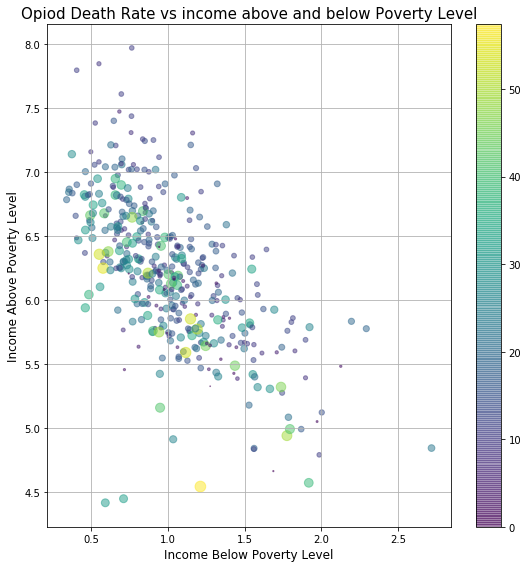

In [8]:


fig, ax = plt.subplots( figsize=(8,8))

sctr =ax.scatter(incomeBelow, incomeAbove, c=deathrate, s=deathrate*2,  alpha=0.5, cmap='viridis')
#plt.colorbar(sctr, ax, format='$%d')
plt.colorbar(sctr)
ax.grid(True)
ax.set_xlabel('Income Below Poverty Level', fontsize=12)
ax.set_ylabel('Income Above Poverty Level', fontsize=12)
ax.set_title('Opiod Death Rate vs income above and below Poverty Level', fontsize=15)


fig.tight_layout()
plt.savefig("Charts/povertyVSdeathRate.png")
plt.show()
#ADAM LUKE: very nice plot!  Make sure to label the color bar.  (you don't need to do this in 
#Python, you could just add a text box in power point)

In [9]:
t_hold = merged_df['psUTotal'].quantile(0.75)
plot_df = merged_df[merged_df['psUTotal']>t_hold]

x_axis = plot_df['VALUE']
y_axis = (plot_df['psUTotal'].div(plot_df['population'])).mul(100)
c_axis = plot_df['African/American']/plot_df['population']
s_axis = c_axis*300

x_label = 'Opioid Death Rate (Age-adjusted) (%)'
y_label = '% Population Under Poverty Line'
title = 'Opiod Death Rate  vs % Population of African American'
outfile = 'Charts/povertyVSdeathrateVSafricanamerican.png'

In [10]:
plot_df.shape, t_hold

((107, 58), 121376.25)

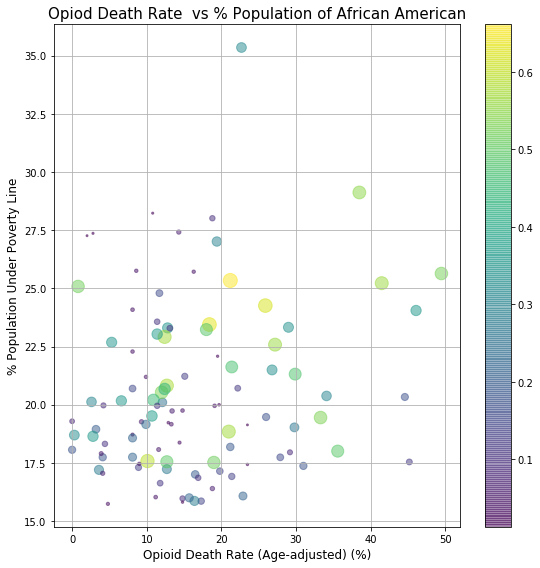

In [11]:
fig, ax = plt.subplots( figsize=(8,8))

sctr =ax.scatter(x_axis, y_axis, c=c_axis, s=s_axis, alpha=0.5, cmap='viridis')
#plt.colorbar(sctr, ax, format='$%d')
plt.colorbar(sctr)
ax.grid(True)
ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_title(title, fontsize=15)

fig.tight_layout()
plt.savefig(outfile)

In [12]:
t_hold = merged_df['withE'].quantile(0.75)
plot_df = merged_df[merged_df['withE']>t_hold]

x_axis = plot_df['VALUE']
y_axis = (plot_df['withE'].div(plot_df['population'])).mul(100)
c_axis = plot_df['African/American']/plot_df['population']
s_axis = c_axis*300

x_label = 'Opioid Death Rate (Age-adjusted) (%)'
y_label = '% Population with Education'
title = 'Opiod Death Rate vs % Population of African American'
outfile = 'Charts/withEVSdeathrateVSafricanamerican.png'

In [13]:
plot_df.shape, t_hold

((107, 58), 70640.25)

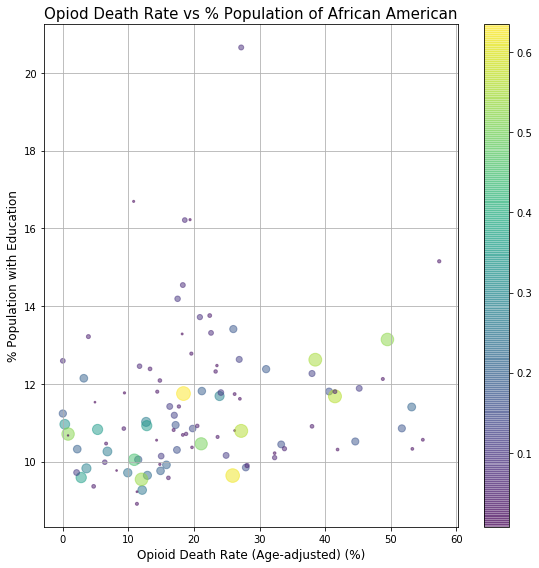

In [16]:
fig, ax = plt.subplots( figsize=(8,8))

sctr =ax.scatter(x_axis, y_axis, c=c_axis, s=s_axis, alpha=0.5, cmap='viridis')
#plt.colorbar(sctr, ax, format='$%d')
plt.colorbar(sctr)
ax.grid(True)
ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_title(title, fontsize=15)

fig.tight_layout()
plt.savefig(outfile)
#plt.show()


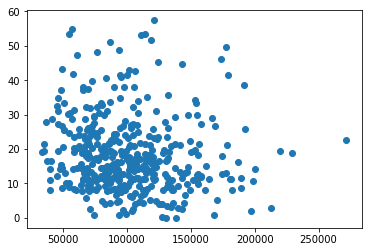

In [17]:
plt.plot(merged_df['psUTotal'],merged_df['VALUE'],'o')

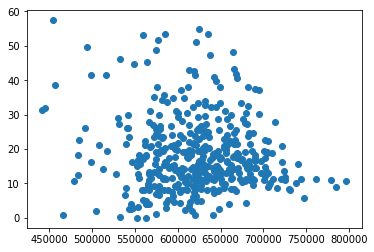

In [18]:
plt.plot(merged_df['psOTotal'],merged_df['VALUE'],'o')

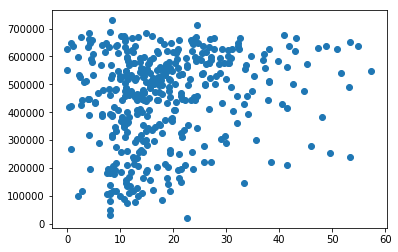

In [19]:
plt.plot(merged_df['VALUE'],merged_df['White'],'o')

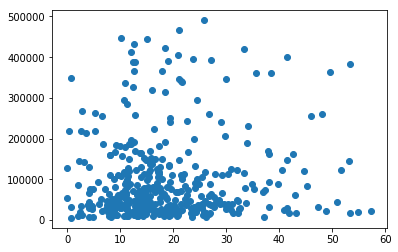

In [20]:
plt.plot(merged_df['VALUE'],merged_df['African/American'],'o')

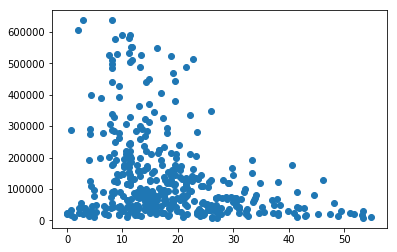

In [21]:
plt.plot(merged_df['VALUE'],merged_df['Hispanic/Latin'],'o')

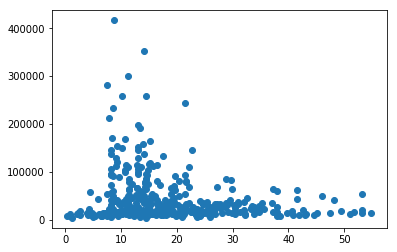

In [22]:
plt.plot(merged_df['VALUE'],merged_df['Asian'],'o')

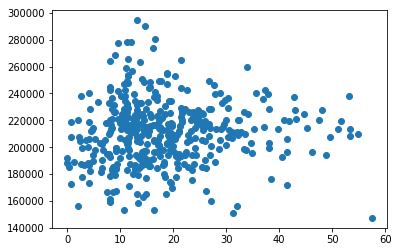

In [23]:
plt.plot(merged_df['VALUE'],merged_df['woE'],'o')

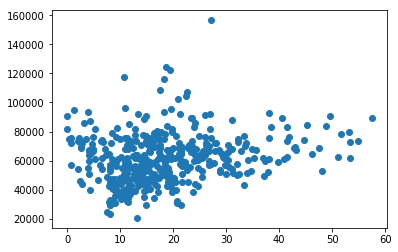

In [24]:
plt.plot(merged_df['VALUE'],merged_df['withE'],'o')

In [25]:
opioid_df['s_d'] = opioid_df['STATEABBREVIATION'].str.cat(opioid_df['DISTRICT'].astype('str'))
opioid_df.head()

,Unnamed: 0,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,s_d
0,0,1,1,2014,MH_fac,11.0,Alabama,AL,AL1
1,1,1,2,2014,MH_fac,21.0,Alabama,AL,AL2
2,2,1,3,2014,MH_fac,26.0,Alabama,AL,AL3
3,3,1,4,2014,MH_fac,28.0,Alabama,AL,AL4
4,4,1,5,2014,MH_fac,16.0,Alabama,AL,AL5


In [26]:
df = opioid_df[opioid_df['INDICATOR']=='drugdeathrate']
df.nunique()
#df.pivot_table('VALUE',index='YEAR', columns='STATEABBREVIATION')
tmp = df.pivot_table('VALUE',index='YEAR', columns='STATEABBREVIATION')
#df.groupby('YEAR')['VALUE'].mean()

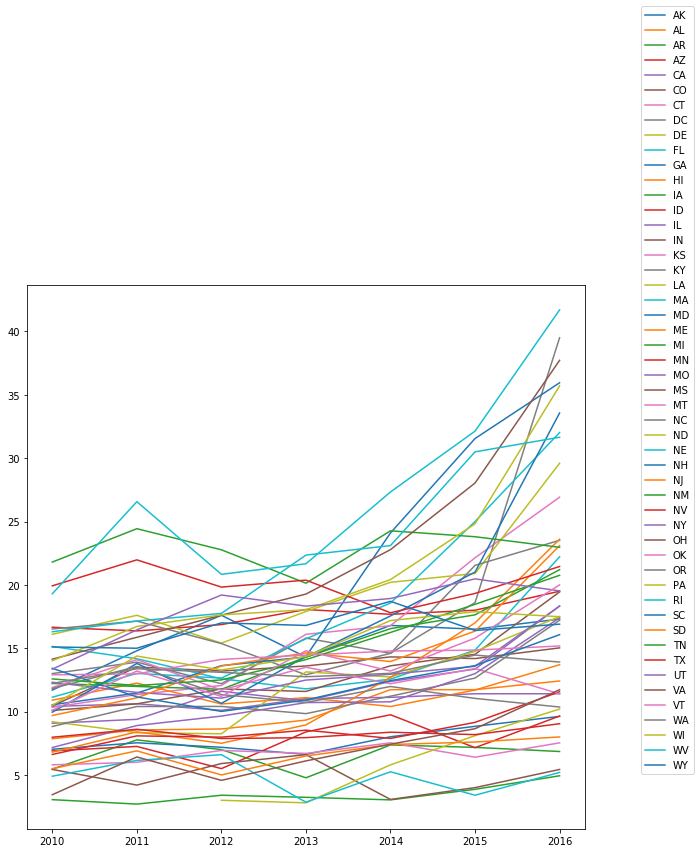

In [27]:
plt.figure(figsize=(10,10))
for i in range(len(tmp.columns)) :
    plt.plot(tmp.index, tmp.iloc[:,i], label=tmp.columns[i])
#plt.plot(tmp.index, tmp.iloc[:,1], label=tmp.columns[1])
plt.legend(loc=(1.1,.1))

In [28]:
tmpT = tmp.T
tmpT.head()
year = 2010
thld = tmpT[year].quantile(0.75)
pltdf = tmpT[tmpT[year]>thld].T
pltdf.head()

STATEABBREVIATION,AZ,DE,FL,KY,NM,NV,OH,PA,RI,SC,UT,WV,WY
YEAR,,,,,,,,,,,,,
2010,16.655556,16.1,15.137037,16.520000,21.800000,19.925,14.13750,14.016667,16.30,13.414286,13.350,19.300000,15.1
2011,16.366667,17.6,14.170370,17.140000,24.433333,21.975,15.86250,16.716667,17.15,11.157143,16.450,26.566667,15.0
2012,16.866667,15.4,12.588889,15.366667,22.766667,19.825,17.60625,17.633333,17.75,10.014286,19.200,20.833333,17.0
2013,18.055556,17.9,11.792593,12.900000,20.133333,20.375,19.27500,18.038889,22.35,10.914286,18.325,21.666667,16.8
2014,17.677778,20.2,12.562963,14.600000,24.266667,17.800,22.78125,20.416667,23.10,12.442857,18.925,27.333333,18.7


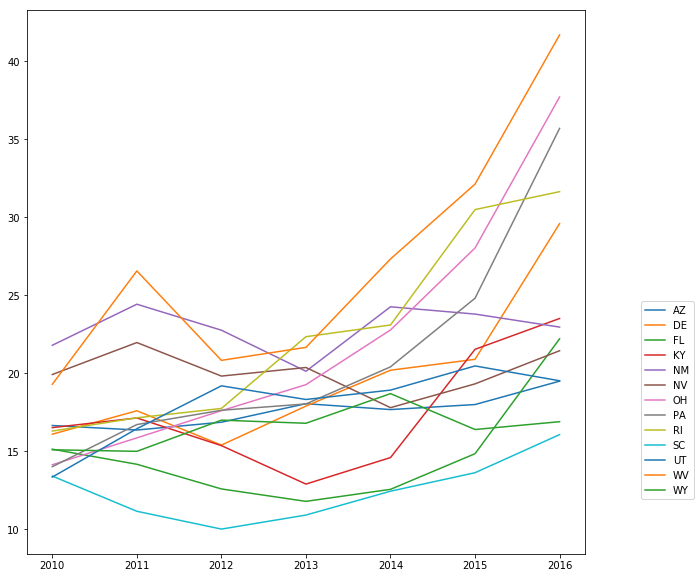

In [29]:
plt.figure(figsize=(10,10))
for i in range(len(pltdf.columns)) :
    plt.plot(pltdf.index, pltdf.iloc[:,i], label=pltdf.columns[i])
#plt.plot(tmp.index, tmp.iloc[:,1], label=tmp.columns[1])
plt.legend(loc=(1.1,.1))

In [30]:
tmpT = tmp.T
tmpT.head()
year = 2010
thld = tmpT[year].quantile(0.25)
pltdf = tmpT[tmpT[year]<thld].T
pltdf.head()

STATEABBREVIATION,AR,GA,IA,ID,KS,ME,MN,MS,ND,NE,NY,SD,VA
YEAR,,,,,,,,,,,,,
2010,5.450000,7.028571,3.050000,6.90,5.800000,6.80,6.616667,5.433333,3.4,4.90,7.165385,5.5,3.440000
2011,7.766667,7.538462,2.700000,7.25,6.000000,8.40,8.083333,4.200000,NaN,6.15,8.900000,6.9,6.420000
2012,7.000000,7.184615,3.400000,5.50,6.933333,7.50,7.983333,5.900000,3.0,6.60,9.644444,5.0,4.572727
2013,4.775000,6.621429,3.233333,8.40,6.700000,8.95,8.533333,6.600000,2.8,2.85,10.711111,6.5,6.109091
2014,7.366667,8.014286,3.033333,9.75,7.533333,12.70,7.883333,3.066667,5.8,5.25,10.770370,7.4,7.427273


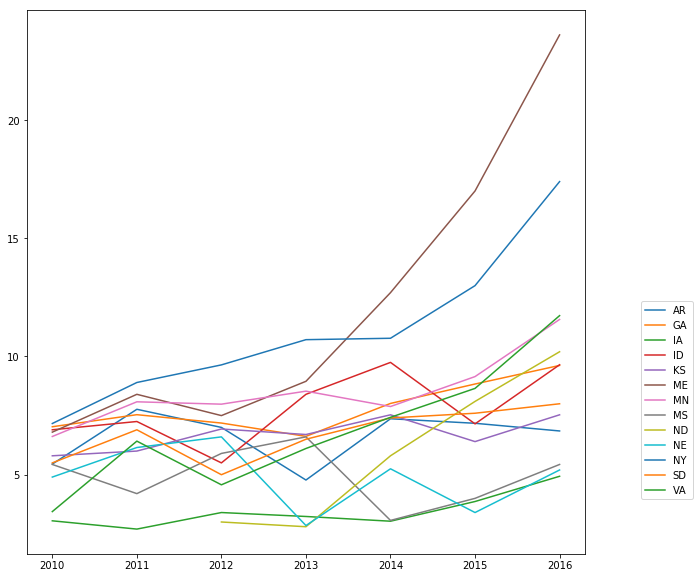

In [31]:
plt.figure(figsize=(10,10))
for i in range(len(pltdf.columns)) :
    plt.plot(pltdf.index, pltdf.iloc[:,i], label=pltdf.columns[i])
#plt.plot(tmp.index, tmp.iloc[:,1], label=tmp.columns[1])
plt.legend(loc=(1.1,.1))

In [32]:
opioid_df.head()

,Unnamed: 0,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,s_d
0,0,1,1,2014,MH_fac,11.0,Alabama,AL,AL1
1,1,1,2,2014,MH_fac,21.0,Alabama,AL,AL2
2,2,1,3,2014,MH_fac,26.0,Alabama,AL,AL3
3,3,1,4,2014,MH_fac,28.0,Alabama,AL,AL4
4,4,1,5,2014,MH_fac,16.0,Alabama,AL,AL5


In [33]:
df = opioid_df[opioid_df['INDICATOR']=='drugdeathrate']
df.nunique()
#df.pivot_table('VALUE',index='YEAR', columns='STATEABBREVIATION')
dfyr = df.pivot_table('VALUE',index='YEAR', columns='s_d').T
#df.groupby('YEAR')['VALUE'].mean()

In [34]:
dfyr['rate_inc'] = dfyr[2016] - dfyr[2013]
dfyr.head()

YEAR,2010,2011,2012,2013,2014,2015,2016,rate_inc
s_d,,,,,,,,
AK1,11.7,14.8,17.6,14.3,16.8,16.5,17.3,3.0
AL1,11.1,12.1,12.6,13.5,14.5,15.0,12.7,-0.8
AL2,2.3,NaN,1.8,2.2,3.9,2.0,0.3,-1.9
AL3,5.0,2.4,4.3,4.9,8.4,7.0,6.8,1.9
AL4,7.4,8.8,12.2,15.7,12.2,12.6,11.7,-4.0


In [35]:
dfyr.describe()
dfyr['bin'] = pd.cut(dfyr[2013],10)
dfyr.groupby('bin')[2013, 2016, 'rate_inc'].mean()

YEAR,2013,2016,rate_inc
bin,,,
"(0.461, 4.43]",2.183871,4.519355,2.335484
"(4.43, 8.36]",6.765333,10.898667,4.133333
"(8.36, 12.29]",10.303008,15.212030,4.909023
"(12.29, 16.22]",14.186735,20.864286,6.677551
"(16.22, 20.15]",17.821277,26.300000,8.478723
"(20.15, 24.08]",21.648485,35.527273,13.878788
"(24.08, 28.01]",25.575000,40.250000,14.675000
"(28.01, 31.94]",NaN,NaN,NaN
"(31.94, 35.87]",33.000000,51.700000,18.700000


In [36]:
df = opioid_df[opioid_df['INDICATOR']=='drugdeathrate']
df.nunique()
#df.pivot_table('VALUE',index='YEAR', columns='STATEABBREVIATION')
tmp = df.pivot_table('VALUE',index='STATEABBREVIATION', columns='YEAR')
tmp.head()
#df.groupby('YEAR')['VALUE'].mean()
min = tmp.min()
avg = tmp.mean()
max = tmp.max()
dfs = pd.DataFrame([min, avg, max], index=['Min','Mean','Max']).T
dfs


,Min,Mean,Max
YEAR,,,
2010,3.050000,10.802317,21.800000
2011,2.700000,12.194436,26.566667
2012,3.000000,11.724742,22.766667
2013,2.800000,12.478972,22.350000
2014,3.033333,13.786818,27.333333
2015,3.400000,15.479699,32.133333
2016,4.933333,18.848644,41.700000


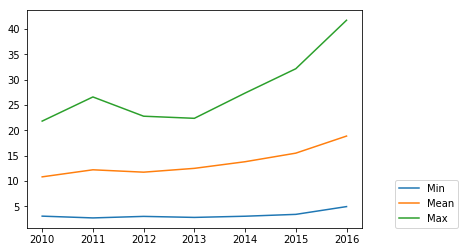

In [37]:
for i in range(len(dfs.columns)) :
    plt.plot(dfs.index, dfs.iloc[:,i], label=dfs.columns[i])
plt.legend(loc=(1.1,0))